In [57]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import StandardScaler

In [58]:
df = pd.read_excel("Online Retail.xlsx")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### From this information we can see that in the Description and CustomerID have the null value

In [60]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### As we see CustomerID having the 135,080 ,but filling this by random vlaue is not suitable beause without proper CustomerID we cannot assign the customers the transactions
#### so we are going to drop it 

In [61]:
df = df.dropna(subset=["CustomerID"])

In [62]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [64]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [66]:
invalid_qty_df = df[df['Quantity'] <= 0]
invalid_qty_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [67]:
invalid_price_df = df[df['UnitPrice'] <= 0]
invalid_price_df.count()


InvoiceNo      40
StockCode      40
Description    40
Quantity       40
InvoiceDate    40
UnitPrice      40
CustomerID     40
Country        40
dtype: int64

In [68]:
## here we remove the data that have in the quantity less than 0 or unitprice also same
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [69]:
invalid_price_df = df[df['UnitPrice'] <= 0]
invalid_price_df.count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [70]:
df[['Quantity', 'UnitPrice']].describe()


,Quantity,UnitPrice
count,397884.000000,397884.000000
mean,12.988238,3.116488
std,179.331775,22.097877
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,8142.750000


In [71]:
df.duplicated().sum()

5192

In [72]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [73]:
df.duplicated(subset=['InvoiceNo', 'StockCode', 'CustomerID']).sum()

10043

In [74]:
dup_rows = df[df.duplicated(subset=['InvoiceNo', 'StockCode', 'CustomerID'], keep=False)]
dup_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
483,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,3,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom


In [75]:
dup_rows.shape

(19157, 8)

In [76]:
df = df.drop_duplicates(subset=['InvoiceNo', 'StockCode', 'CustomerID'])

In [77]:
df.duplicated(subset=['InvoiceNo', 'StockCode', 'CustomerID']).sum()

0

In [78]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [79]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [80]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [81]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Cleaned Data

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387841 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    387841 non-null  object        
 1   StockCode    387841 non-null  object        
 2   Description  387841 non-null  object        
 3   Quantity     387841 non-null  int64         
 4   InvoiceDate  387841 non-null  datetime64[ns]
 5   UnitPrice    387841 non-null  float64       
 6   CustomerID   387841 non-null  float64       
 7   Country      387841 non-null  object        
 8   TotalPrice   387841 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 29.6+ MB


In [83]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [84]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

## Engineered Features

In [85]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(snapshot_date - x.max()).days,
    'InvoiceNo' :'nunique',
    'TotalPrice':'sum'})
rfm.columns=['Recency','Frequency','Monetary']

In [86]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1595.64
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [87]:
rfm.shape

(4338, 3)

In [88]:
rfm.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [89]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2038.899609
std,100.014169,7.697998,8976.554606
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,305.145000
50%,51.000000,2.000000,658.760000
75%,142.000000,5.000000,1647.905000
max,374.000000,209.000000,280206.020000


## Normalized Data

In [90]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)



In [91]:
rfm_scaled = pd.DataFrame(rfm_scaled,columns=rfm.columns,index=rfm.index) 
rfm_scaled.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,2.334574,-0.425097,8.372184
12347.0,-0.905340,0.354417,0.253033
12348.0,-0.175360,-0.035340,-0.049385
12349.0,-0.735345,-0.425097,-0.031346
12350.0,2.174578,-0.425097,-0.189905


In [92]:
rfm_scaled.shape

(4338, 3)

In [93]:
rfm_scaled.isnull().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

### Elbow method of cluster

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [95]:
inertia =[]
k = range(1,11)
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

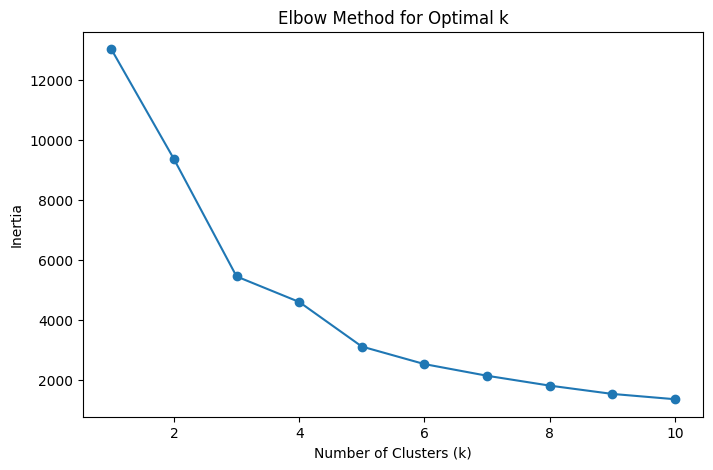

In [96]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [97]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12346.0,326,1,77183.60,3
12347.0,2,7,4310.00,0
12348.0,75,4,1595.64,0
12349.0,19,1,1757.55,0
12350.0,310,1,334.40,1


In [98]:
cluster_summary = rfm.groupby('Cluster').mean()
cluster_summary

,Recency,Frequency,Monetary
Cluster,,,
0,41.166460,4.741785,1881.553621
1,246.245179,1.583104,556.999937
2,1.857143,128.714286,51170.445714
3,27.875000,38.125000,113130.529375


In [99]:
rfm['Cluster'].value_counts()

Cluster
0    3226
1    1089
3      16
2       7
Name: count, dtype: int64

#### this K-mean clustering result categories into four distict customer segments based on Recency,Recency,Frequency and Monetary Values.These segment represent VIP customer loyal high value customer regular customer and at risk customereach with the different purchase behaviors and business implication

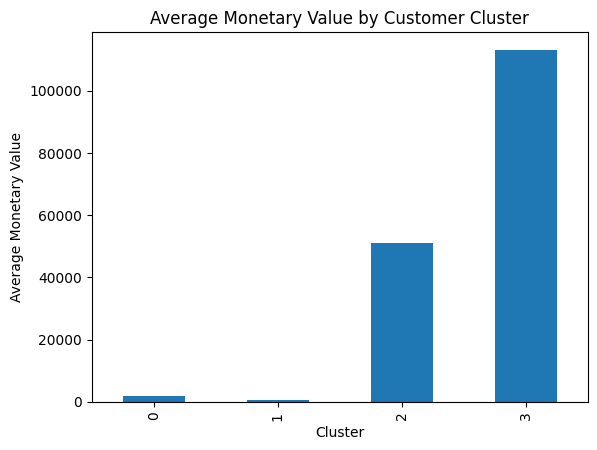

In [100]:
cluster_summary['Monetary'].plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Average Monetary Value')
plt.title('Average Monetary Value by Customer Cluster')
plt.show()

#### The K-Means clustering method has been able to segment customers effectively into four categories based on their purchase activity using Recency, Frequency, and Monetary values. From this analysis, it has been identified that a few customers make a major contribution toward total revenue, whereas a major segment of customers displays moderate as well as low levels of activity. Customer segmentation based on data science helps businesses in gaining knowledge to enhance customer experience, retention, and ultimately revenue maximization in e-commerce.

#### Customer segmentation was done by applying the K-Means clustering method on the normalized RFM features of cleaned online retail transaction data. The Elbow Method was used to select the number of clusters, k = 4, that best described the customer segmentation. These resulting groups can further be defined and classified on the basis of VIP customers, loyal high-value customers, frequent or regular customers, and at-risk customers. Such segments can help in understanding customer behavior and serve as a basis for decision-making for customer loyalty and customization strategies.